IRIS FLOWERS CLASSIFICATION PROBLEM

Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Importing Dataset in CSV format

In [ ]:
data= pd.read_csv('IRIS.csv')

In [ ]:
data.head() # Displays first 5 rows in the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.tail() # Displays last 5 rows in the dataset

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
data.info() # Displays the details like count non-null variables and column datatypes along with the column name. It will also display the memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
data.shape # Display the total number of rows and columns in the dataset

(150, 5)

In [ ]:
data.isna().sum() # Check wheather there is null values or not. In our dataset there is no null-values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [ ]:
data.describe() # Satistical Description of the data

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
total = data['species'].value_counts()
total

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64

In [ ]:
label = data.species.unique().tolist()
label

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

VISUALIZATIONS

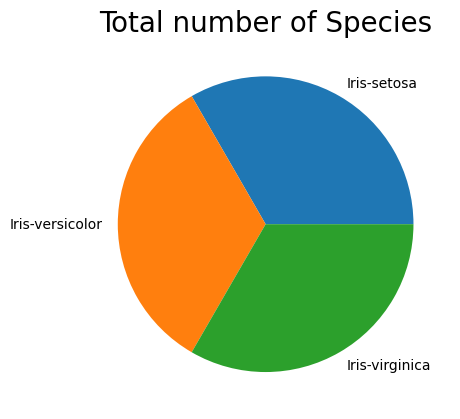

In [ ]:
plt.pie(total,labels=label)
plt.title("Total number of Species",fontsize=20)
plt.show()

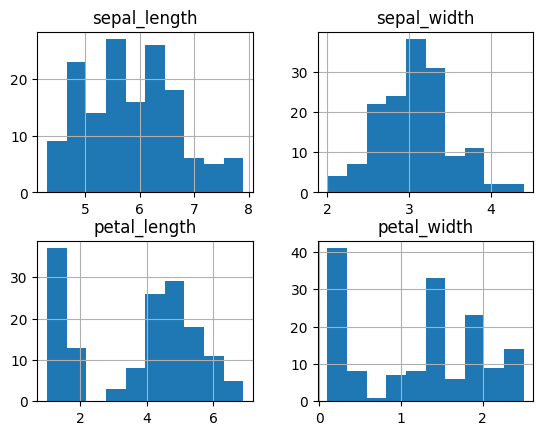

In [ ]:
data.hist() # Graphical representation of the data
plt.show()

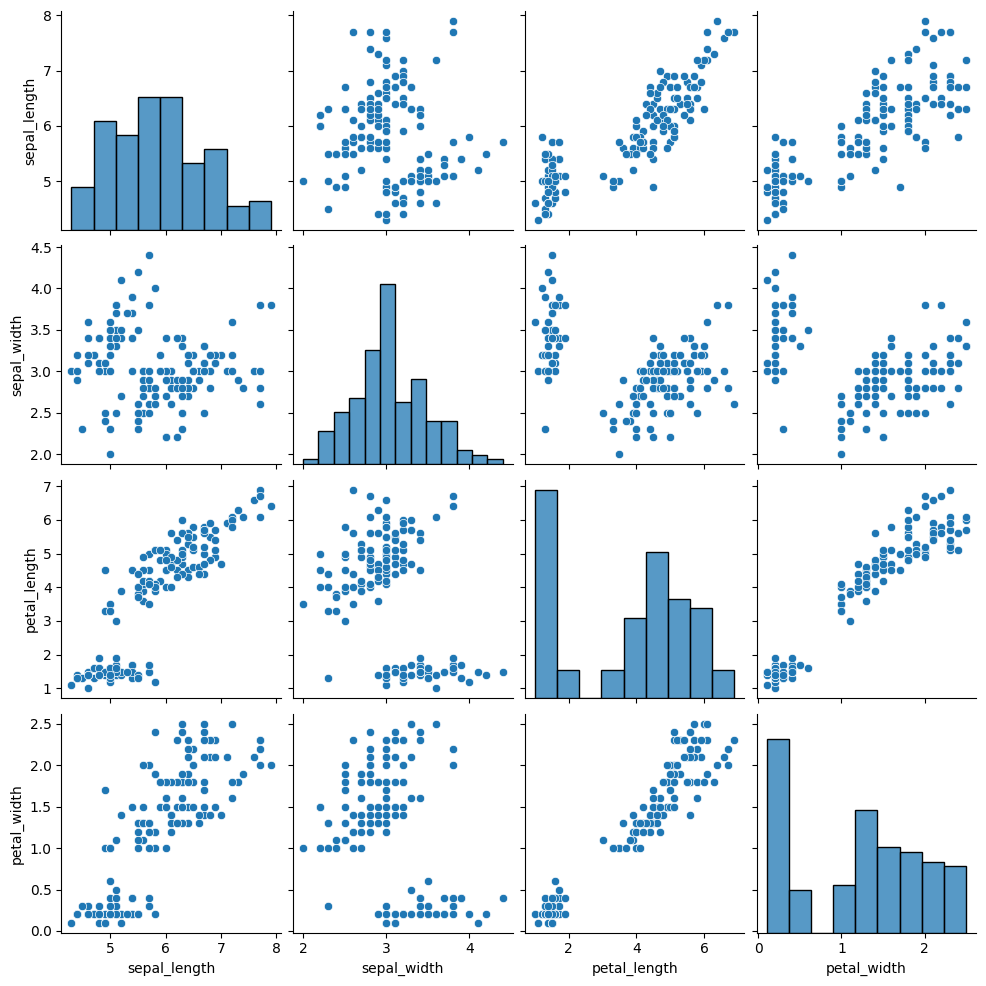

In [ ]:
sns.pairplot(data) # Pair plot graph

In [ ]:
data.corr() # Finding Correlation Matrix

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<Axes: >

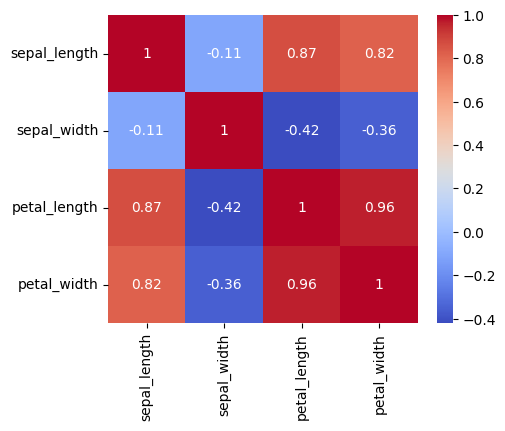

In [ ]:
# Displaying Correlation Data using Heat Map Graphical Representation
cor_rel= data.corr()
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(cor_rel, annot=True, ax=ax, cmap = 'coolwarm')

Dependent and Independent Variables

In [ ]:
X = data.drop(['species'], axis =1)
y=data['species']

In [ ]:
print(X)
print(y)

     sepal_length  sepal_width  petal_length  petal_width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: obj

Splitting data into Train and Test of the Dataset

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


Models Building

We used two model
1. Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
print("Accuracy of Logistic Regression Model is : ",lr_model.score(X_test, y_test) * 100)

Accuracy of Logistic Regression Model is :  100.0


2. KNeighbors Classifier Model


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
print("Accuracy of KNN Model is : ",knn_model.score(X_test,y_test)*100)

Accuracy of KNN Model is :  96.66666666666667


Evaluating the Models

In [ ]:
lr_predic = lr_model.predict(X_test)
knn_predic = knn_model.predict(X_test)

Checking Accuracy of each Models

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy of Logistic Regression Model is :",accuracy_score(y_test, lr_predic))
print("Accuracy of KNN Model is :",accuracy_score(y_test, knn_predic))

Accuracy of Logistic Regression Model is : 1.0
Accuracy of KNN Model is : 0.9666666666666667


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Confusion Matrix and Classification Report of Logistic Regression Model

In [ ]:
print("Accuracy of Logistic Regression Model is :",accuracy_score(y_test, lr_predic))
con=confusion_matrix(y_test, lr_predic)
con
print(classification_report(y_test, lr_predic))

Accuracy of Logistic Regression Model is : 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         8

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Confusion Matrix and Classification Report of KNN Model

In [ ]:
print("Accuracy of KNN Model is :",accuracy_score(y_test, knn_predic))
con=confusion_matrix(y_test, knn_predic)
con
print(classification_report(y_test, knn_predic))

Accuracy of KNN Model is : 0.9666666666666667
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.89      1.00      0.94         8

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



We have used KNN model and Logistic Regression Model. In this Logistic Regression Model gives 100 % accuracy and KNN model gives 97 % accuracy.It shows that Logistic Regression Model is very accurate.